220 Counter({60: 22, 57: 21, 62: 21, 64: 19, 55: 18, 59: 18, 52: 16, 65: 14, 50: 13, 67: 10, 54: 8, 48: 7, 53: 6, 69: 5, 43: 4, 47: 4, 58: 4, 45: 3, 70: 2, 56: 2, 38: 1, 61: 1, 36: 1})
254 Counter({72: 35, 74: 31, 71: 29, 76: 26, 69: 23, 77: 23, 79: 21, 67: 17, 81: 10, 66: 8, 64: 7, 62: 4, 68: 4, 65: 3, 73: 3, 83: 3, 60: 2, 84: 2, 70: 2, 80: 1})
474 Counter({72: 35, 74: 31, 71: 29, 69: 28, 67: 27, 64: 26, 76: 26, 62: 25, 60: 24, 77: 23, 57: 21, 79: 21, 55: 18, 59: 18, 65: 17, 52: 16, 50: 13, 81: 10, 54: 8, 66: 8, 48: 7, 53: 6, 43: 4, 47: 4, 70: 4, 58: 4, 68: 4, 45: 3, 73: 3, 83: 3, 56: 2, 84: 2, 38: 1, 61: 1, 36: 1, 80: 1})
OrderedDict([('D', 70), ('G', 70), ('C', 69), ('E', 68), ('A', 62), ('B', 54), ('F', 46), ('F#', 16), ('A#', 8), ('G#', 7), ('C#', 4)])
OrderedDict([('2M', 188), ('2m', 109), ('3m', 75), ('3M', 29), ('4J', 19), ('5J', 16), ('8va', 10), ('Unisono', 7), ('6m', 6), ('7m', 5), ('6M', 4), ('4A', 2), ('12J', 1), ('9M', 1)])


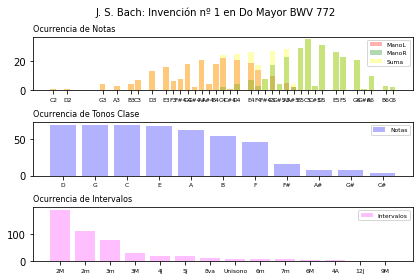

In [2]:
import mido
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

mid = mido.MidiFile("bwv772.mid")
manoL = mid.tracks[2]
manoR = mid.tracks[1]
nName = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
iName = ['Unisono','2m', '2M', '3m', '3M', '4J', '4A', '5J', '6m', '6M', '7m', '7M', '8va', '9am', '9M', '10m', '10M', '11J', '11A', '12J']

#//////NotasMano Izquierda
ntL = []
for notaL in manoL:
    if notaL.type == 'note_on' and notaL.velocity > 0:
        ntL.append(notaL.note)
vecesntL = Counter(ntL)
print(len(ntL), vecesntL)

#//////Notas Mano Derecha
ntR = []
for notaR in manoR:
    if notaR.type == 'note_on' and notaR.velocity > 0:
        ntR.append(notaR.note)
vecesntR = Counter(ntR)
print(len(ntR), vecesntR)

#//////Suma de Manos
ntAll = ntL + ntR
vecesntAll = Counter(ntAll)
print(len(ntAll), vecesntAll)

#//////Orden Ascendente de Tonos Clase
fMn1 = []
ntAll.sort()
for i in ntAll:
    indexnote = nName[i % 12]
    vMn1 = str(indexnote)
    fMn1.append(vMn1)
ntAllOneName = Counter(fMn1)
ntAllOneNameOr = OrderedDict(ntAllOneName.most_common())
print(ntAllOneNameOr)

#//////NotasSinRepeticiones y aX1 labels
ntAllOne = list(dict.fromkeys(ntAll))

#//////Numero MIDI a NotayOctava
fMn2 = []
for i in ntAllOne:
    indexnote = nName[i % 12]
    indexoct = round((i / 12) -1)
    vMn2 = str(indexnote) + str(indexoct)
    fMn2.append(vMn2)

#//////Intervalos
iManoL = [j-i for i, j in zip(ntL[:-1], ntL[1:])]
iManoR = [j-i for i, j in zip(ntR[:-1], ntR[1:])]
intTL = [abs(n) for n in iManoL]
intTR = [abs(n) for n in iManoR]
intTNL = []
for i in intTL:
    intTNL.append(iName[i])
intTNR = []
for i in intTR:
    intTNR.append(iName[i])
intTN = intTNL + intTNR
iTO = Counter(intTN)
iTOO = OrderedDict(iTO.most_common())
print(iTOO)

#//////Graficar
f, (ax1, ax2, ax3) = plt.subplots(3)
f.suptitle("J. S. Bach: Invención nº 1 en Do Mayor BWV 772", fontsize=10)
f.tight_layout()

ax1.set_title('Ocurrencia de Notas', fontsize=8, loc='left')
ax1.bar(*zip(*vecesntL.items()), label="ManoL", color='red', alpha=0.3)
ax1.bar(*zip(*vecesntR.items()), label="ManoR", color='green', alpha=0.3)
ax1.bar(*zip(*vecesntAll.items()), label="Suma", color='yellow', alpha=0.3)
ax1.set_xticks(ticks=ntAllOne, labels=fMn2, fontsize=6)
ax1.legend(loc='upper right', prop={'size': 6})

ax2.set_title('Ocurrencia de Tonos Clase', fontsize=8, loc='left')
ax2.bar(*zip(*ntAllOneNameOr.items()),label="Notas", color='blue', alpha=0.3)
ax2.legend(loc='upper right', prop={'size': 6})
ax2.xaxis.set_tick_params(labelsize=6)

ax3.set_title('Ocurrencia de Intervalos', fontsize=8, loc='left')
ax3.bar(*zip(*iTOO.items()),label="Intervalos", color='magenta', alpha=0.25)
ax3.legend(loc='upper right', prop={'size': 6})
ax3.xaxis.set_tick_params(labelsize=6)

plt.show()
